<a href="https://colab.research.google.com/github/Shubham-naik-ai/Airbnb_EDA/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
# Importing useful libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/AlmaBetter/EDAcapstoneproject/Airbnb/'


Mounted at /content/drive


In [2]:
# Loading the Dataset

airbnb = pd.read_csv(working_dir_path + 'Airbnb.csv')


In [3]:
# Checking dimensions

airbnb.shape


(48895, 16)

In [4]:
# Here are the first 5 rows of the dataset

airbnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Here are the last 5 rows of the dataset

airbnb.tail()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
# Features (Column names of Dataset)

airbnb.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
# Checking Datatype 

airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# Finding missing values in Dataset

airbnb.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are 4 columns having missing values.(name, host_name, last_review and reviews_per_month)



In [9]:
airbnb['name'].isnull().value_counts()

False    48879
True        16
Name: name, dtype: int64

In [10]:
airbnb['host_name'].isnull().value_counts()

False    48874
True        21
Name: host_name, dtype: int64

In [11]:
airbnb['last_review'].isnull().value_counts()

False    38843
True     10052
Name: last_review, dtype: int64

In [12]:
airbnb['reviews_per_month'].isnull().value_counts()

False    38843
True     10052
Name: reviews_per_month, dtype: int64

# <b> Handling missing values

In [13]:
# Dropping null rows from 'name'

airbnb.dropna(subset=['name'], inplace=True)

In [14]:
airbnb.dropna(subset=['host_name'], inplace=True)

In [15]:
# Replacing all NaN values in 'reviews_per_month' with 0.0

airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0.0)


In [16]:
# Replacing all NaN Dates in 'last_review' with end date of year

airbnb['last_review'] = airbnb['last_review'].fillna('2019-12-31')


In [17]:
# Correcting date format

airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])


In [18]:
# Checking for if there are any missing values left

airbnb.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

There is no missing values left in data now we can do our analysis.

In [19]:
columns_to_keep = ['host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

In [20]:
airbnb = airbnb[columns_to_keep]

## <b> Visualizing and analysis

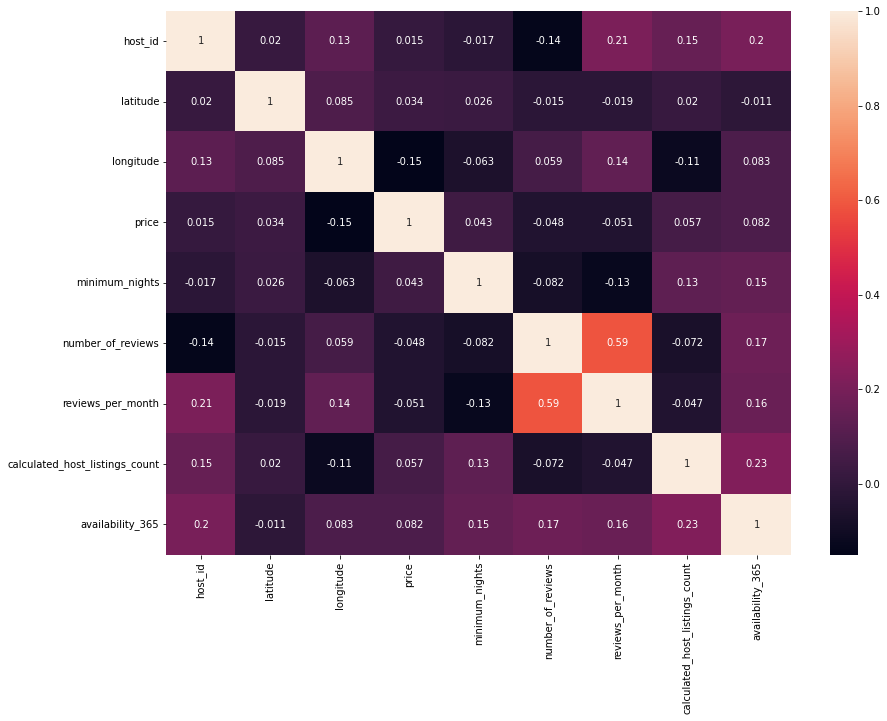

In [21]:
# Correlation matrix

plt.figure(figsize=(14,10))
sns.heatmap(airbnb.corr(),annot=True)


From the graph above we know that there is not a correlation between variables

## <b> Reviews per month  Vs  Price

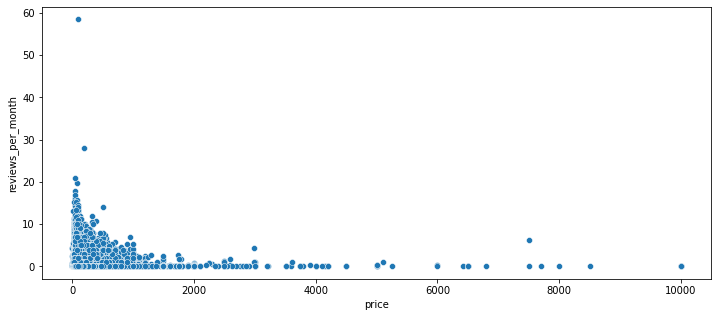

In [22]:
# Observing price and reviews_per_month columns

a, ax = plt.subplots(figsize=(12, 5))
fig = sns.scatterplot(x='price', y='reviews_per_month', data=airbnb)


**Number of reviews Vs Price**

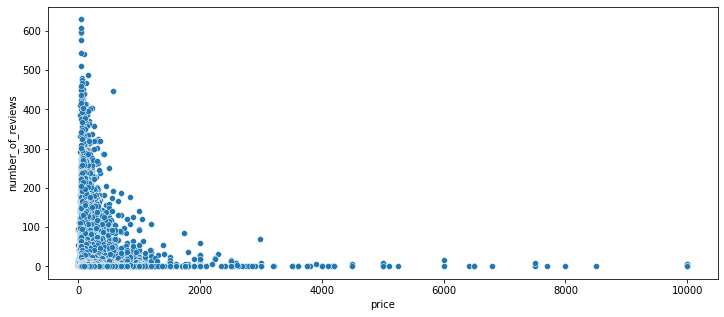

In [23]:
# Observing price and number_of_reviews columns

a, ax = plt.subplots(figsize=(12, 5))
fig = sns.scatterplot(x='price', y='number_of_reviews', data=airbnb)


By analysing above plots we can see that expensive listings has fewer reviews and less expensive lsitings has more reviews.

Analyzing **host_id** 

In [24]:
airbnb['host_id'] = airbnb['host_id'].astype(str)
airbnb['host_id'].describe()


count         48858
unique        37425
top       219517861
freq            327
Name: host_id, dtype: object

There are 37425 unique hosts

In [25]:
# Checking top host listings counts

airbnb.host_id.value_counts().head()


219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

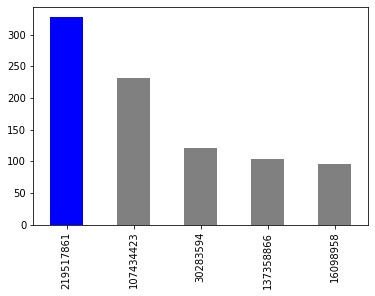

In [26]:
airbnb.host_id.value_counts().head().plot(kind = 'bar',color=['blue', 'grey', 'grey', 'grey', 'grey'])

 **219517861** having the most listings count of 327.

## <b> Room type

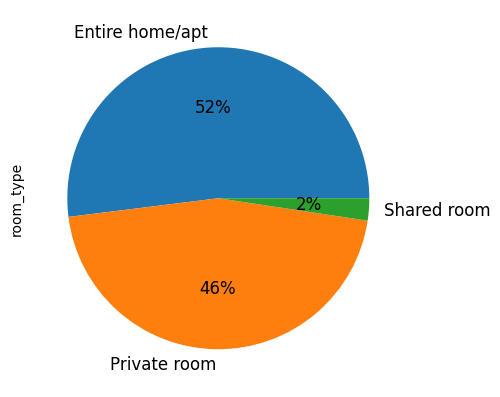

In [27]:
# Analyzing listings 

fig = plt.figure(figsize=(5,5), dpi=100)
airbnb['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)


In [28]:
airbnb['room_type'].value_counts()

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

The majority of the listings are Entire **home/apts** or **Private rooms**.

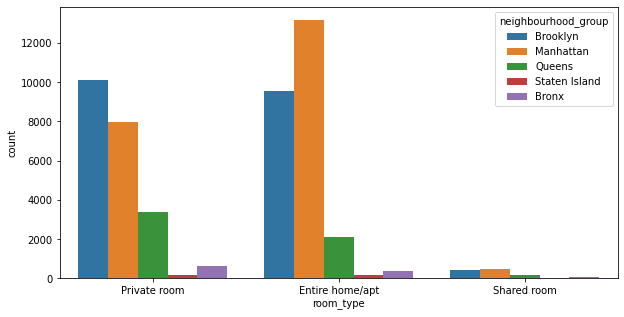

In [29]:
# Plotting room_type and neighbourhood_group on a bar-graph

plt.figure(figsize=(10,5))
sns.countplot(data = airbnb, x = 'room_type', hue = 'neighbourhood_group')


Analyzing **neighbourhood_group**

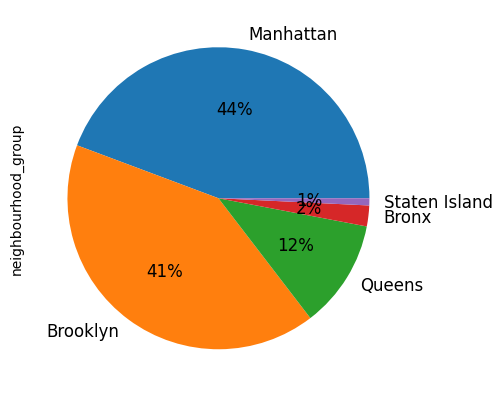

In [30]:
# Plotting neighbourhood_group on a pie-chart

fig = plt.figure(figsize=(5,5), dpi=100)
airbnb['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)


In [31]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [32]:
airbnb['neighbourhood_group'].describe()

count         48858
unique            5
top       Manhattan
freq          21643
Name: neighbourhood_group, dtype: object

In [33]:
airbnb['neighbourhood'].describe()

count            48858
unique             221
top       Williamsburg
freq              3917
Name: neighbourhood, dtype: object

In [34]:
airbnb['neighbourhood'].value_counts().head()

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
Name: neighbourhood, dtype: int64

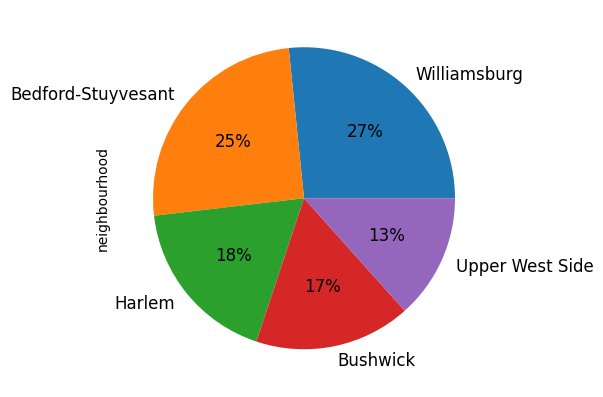

In [35]:
# Analyzing top busiest neighbourhood

fig = plt.figure(figsize=(5,5), dpi=100)
airbnb['neighbourhood'].value_counts().head().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)


In [36]:
airbnb.groupby('neighbourhood_group')['neighbourhood'].value_counts().head()

neighbourhood_group  neighbourhood
Bronx                Kingsbridge      70
                     Fordham          62
                     Longwood         62
                     Mott Haven       60
                     Concourse        50
Name: neighbourhood, dtype: int64

## <b> Plotting Latitude and Longitude

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


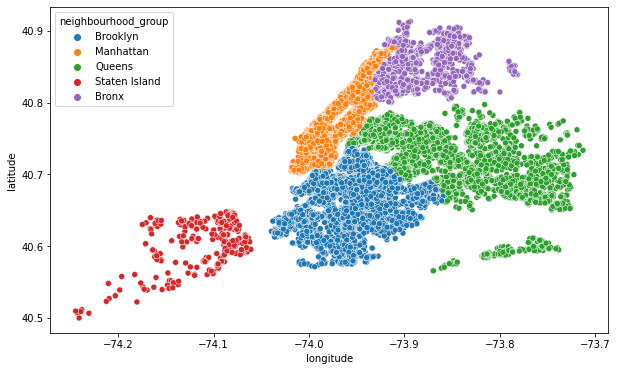

In [37]:
# Plotting neighbourhood_group by thier latitude & longitude on a scatter-plot

plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


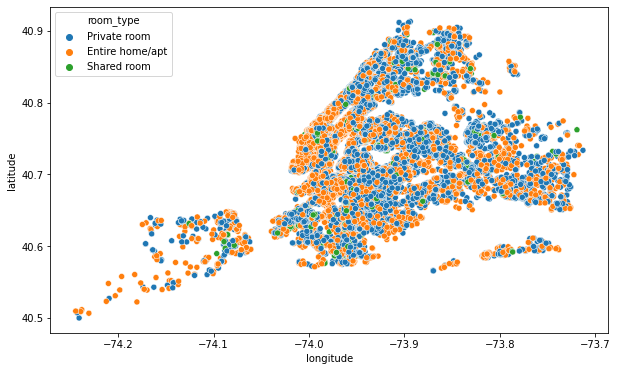

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)


In [39]:
airbnb.groupby('neighbourhood')['availability_365'].value_counts()

neighbourhood  availability_365
Allerton       0                   5
               90                  3
               48                  2
               57                  2
               1                   1
                                  ..
Woodside       348                 1
               353                 1
               354                 1
               362                 1
               363                 1
Name: availability_365, Length: 14180, dtype: int64

In [40]:
airbnb["availability_365"].describe()

count    48858.000000
mean       112.801425
std        131.610962
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

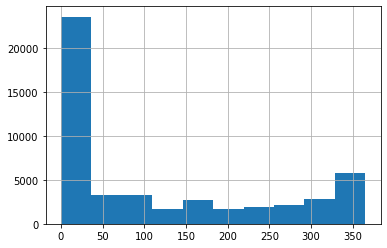

In [41]:
plotav=airbnb["availability_365"].hist()
plotav

In [42]:
airbnb.groupby('neighbourhood_group')['availability_365'].mean()

neighbourhood_group
Bronx            165.704316
Brooklyn         100.235801
Manhattan        112.013445
Queens           144.487288
Staten Island    199.678284
Name: availability_365, dtype: float64

In [43]:
for i in range(1,11):
  print("Minimum nights: ",i)
  print("Count:",len(airbnb[airbnb['minimum_nights'] == i]))

Minimum nights:  1
Count: 12700
Minimum nights:  2
Count: 11694
Minimum nights:  3
Count: 7996
Minimum nights:  4
Count: 3297
Minimum nights:  5
Count: 3033
Minimum nights:  6
Count: 752
Minimum nights:  7
Count: 2056
Minimum nights:  8
Count: 130
Minimum nights:  9
Count: 80
Minimum nights:  10
Count: 482


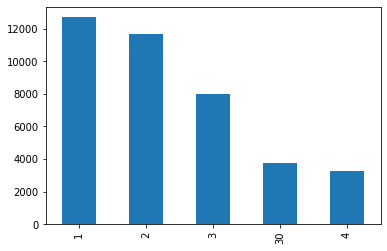

In [44]:
airbnb['minimum_nights'].value_counts().head().plot(kind = 'bar')

In [45]:
airbnb.groupby('neighbourhood_group')['minimum_nights'].mean()

neighbourhood_group
Bronx            4.564738
Brooklyn         6.057693
Manhattan        8.538188
Queens           5.182910
Staten Island    4.831099
Name: minimum_nights, dtype: float64

## <b> Price

Average price of all neighbourhood_group

In [46]:
# Calculating average prices of room_types in neighbourhood_group

nbhd_group_rtype_avg_price = airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
nbhd_group_rtype_avg_price = nbhd_group_rtype_avg_price.sort_values(by='price', ascending=False)
nbhd_group_rtype_avg_price


,neighbourhood_group,room_type,price
6,Manhattan,Entire home/apt,249.238211
3,Brooklyn,Entire home/apt,178.362609
12,Staten Island,Entire home/apt,173.846591
9,Queens,Entire home/apt,147.050573
0,Bronx,Entire home/apt,127.645503
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
4,Brooklyn,Private room,76.510619
10,Queens,Private room,71.776855
11,Queens,Shared room,69.020202


In [47]:
airbnb.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.469238
Brooklyn         124.410523
Manhattan        196.897473
Queens            99.536017
Staten Island    114.812332
Name: price, dtype: float64

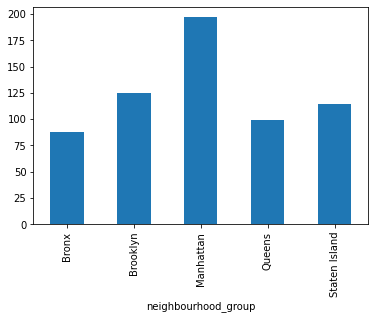

In [48]:
airbnb.groupby('neighbourhood_group')['price'].mean().plot(kind = 'bar')

In [49]:
avg_price = (airbnb['price'].mean(),2)
print(avg_price)

(152.74030864955586, 2)


Average price of all neighbourhood is $152.74.

In [50]:
airbnb.price.value_counts().head(10)

100    2048
150    2046
50     1531
60     1458
200    1400
75     1369
80     1272
65     1190
70     1168
120    1127
Name: price, dtype: int64

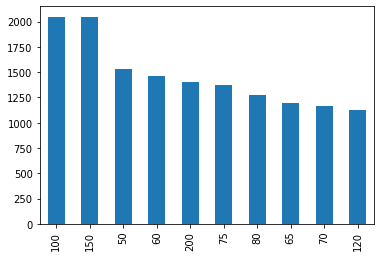

In [51]:
airbnb.price.value_counts().head(10).plot(kind = 'bar')

In [52]:
# Categorizing Airbnb based on price range

airbnb['price_range'] = airbnb['price'].apply(lambda x : '0-100' if x <= 100 else ('101-200' if 100 < x <= 200 else '201+'))


In [53]:
airbnb["price_range"].value_counts()

0-100      23909
101-200    16571
201+        8378
Name: price_range, dtype: int64

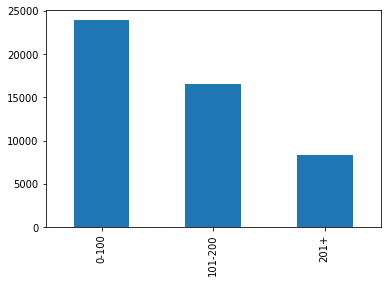

In [54]:
airbnb["price_range"].value_counts().plot(kind='bar')

## Conclusion
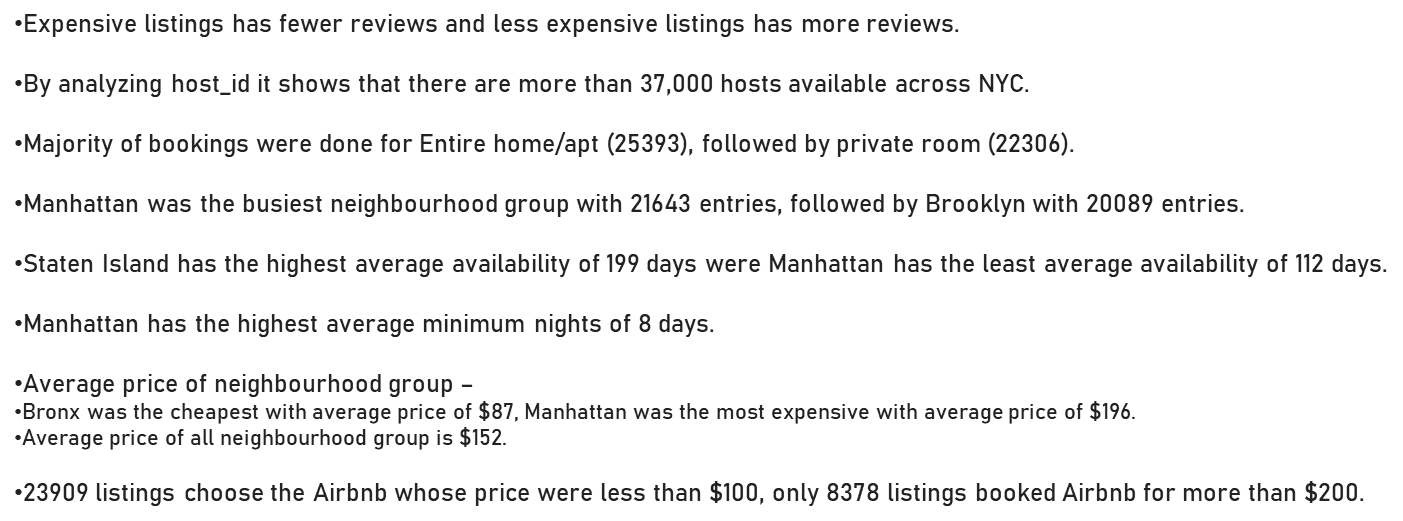